In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso, Ridge, ElasticNet
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score


Problem Statement: 

In [176]:
data=pd.read_csv("bike_share.csv")

Understanding data

In [177]:
data.head(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [178]:
data.shape

(10886, 11)

In [179]:
data.duplicated().sum()

21

In [180]:
data.drop_duplicates(inplace=True)

In [181]:
data.duplicated().sum()

0

In [182]:
data.isna().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [183]:
data.corr()['count']

season        0.163241
holiday      -0.005743
workingday    0.011967
weather      -0.129427
temp          0.393577
atemp         0.389005
humidity     -0.317337
windspeed     0.100212
casual        0.690036
registered    0.970890
count         1.000000
Name: count, dtype: float64

In [184]:
data.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029315,-0.008394,0.008603,0.258008,0.264052,0.189819,-0.147440,0.096536,0.163820,0.163241
holiday,0.029315,1.000000,-0.250650,-0.007172,-0.000020,-0.005512,0.002048,0.008190,0.043584,-0.021311,-0.005743
workingday,-0.008394,-0.250650,1.000000,0.033854,0.030122,0.024722,-0.011607,0.014285,-0.319295,0.120018,0.011967
weather,0.008603,-0.007172,0.033854,1.000000,-0.055684,-0.056001,0.406642,0.007071,-0.136453,-0.110057,-0.129427
temp,0.258008,-0.000020,0.030122,-0.055684,1.000000,0.984920,-0.065301,-0.018937,0.466756,0.317530,0.393577
atemp,0.264052,-0.005512,0.024722,-0.056001,0.984920,1.000000,-0.043934,-0.058440,0.461769,0.313697,0.389005
humidity,0.189819,0.002048,-0.011607,0.406642,-0.065301,-0.043934,1.000000,-0.317920,-0.348238,-0.265321,-0.317337
windspeed,-0.147440,0.008190,0.014285,0.007071,-0.018937,-0.058440,-0.317920,1.000000,0.091474,0.089907,0.100212
casual,0.096536,0.043584,-0.319295,-0.136453,0.466756,0.461769,-0.348238,0.091474,1.000000,0.496587,0.690036
registered,0.163820,-0.021311,0.120018,-0.110057,0.317530,0.313697,-0.265321,0.089907,0.496587,1.000000,0.970890


In [185]:
def linear_best_fit(x,y):
    model=LinearRegression()
    model.fit(x,y)
    y_pred=model.predict(x) 
    print("MSE : ",mean_squared_error(y,y_pred))
    print("MAE : ",mean_absolute_error(y,y_pred))
    print("RMSE : ",np.sqrt(mean_squared_error(y,y_pred)))
    print("MAPE : ",mean_absolute_percentage_error(y,y_pred))
def mean_absolute_percentage_error(y, y_pred): 
    y, y_pred = np.array(y), np.array(y_pred)
    return np.mean(np.abs((y - y_pred) / y)) * 100    


In [186]:
y=data['count']

In [187]:
x=data[['season','temp','atemp','casual']]

In [188]:
###x=data[data.drop(columns=['atemp','weather','holiday','humidity'],inplace=True)]

In [189]:
type(x),type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [198]:
linear_best_fit(x,y)

MSE :  16760.547107422546
MAE :  91.2618940892599
RMSE :  129.46253167392697
MAPE :  377.3454366558312


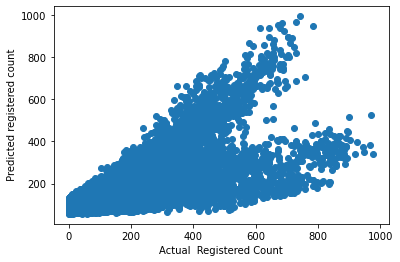

In [202]:
model=LinearRegression()
model.fit(x,y)
y_pred=model.predict(x) 
plt.xlabel("Actual  Registered Count")
plt.ylabel(" Predicted registered count")

plt.scatter(y, y_pred)

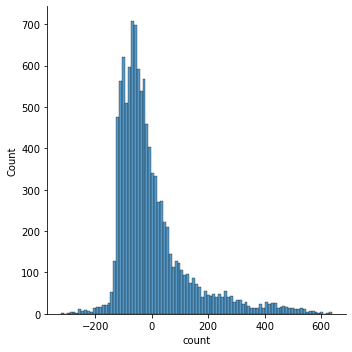

In [205]:
error=y-y_pred
sns.displot(error)

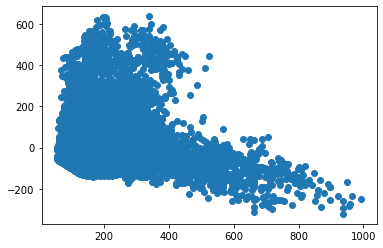

In [209]:
plt.scatter(y_pred,error)